In [43]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Dataset IV

In [44]:
# dataset 4
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y - 1
y.shape

(200,)

In [45]:
num_iter = 100
alpha = 1
lam = 0.01
# lip = 0.5 * (np.linalg.norm(x, ord='fro') ** 2)
# lip

In [46]:
# lip = 0.5 * (np.max(x)**2)
# lip

# Gradient Descent

In [47]:
loss_hist_batch_steepest_gradient = []
w = np.zeros_like(x[0])
w.shape

(4,)

In [48]:
for t in range(num_iter):
    expo = 1 + np.exp(-y * (x @ w))
    posterior = 1 / expo
    res = ((1 - posterior) * y * x.T).T
    grad =  -np.sum(res, axis=0) + 2 * lam * w

    s = np.diag(posterior * (1 - posterior))
    hess =  (x.T @ s @ x) + 2 * lam * np.eye(w.shape[0])
    direction = -grad
    
    loss = np.sum(np.log(expo)) + lam * (w.T @ w)
    # print(loss.shape)
    loss_hist_batch_steepest_gradient.append(loss)
    # ww = ww + alpha * 1.0 / np.sqrt(t) / lip * direction
    lip = np.max(np.linalg.eigvals(hess))
    w = w + alpha * direction / lip


In [49]:
print(min(loss_hist_batch_steepest_gradient))

39.48057476931164


Text(0, 0.5, 'loss')

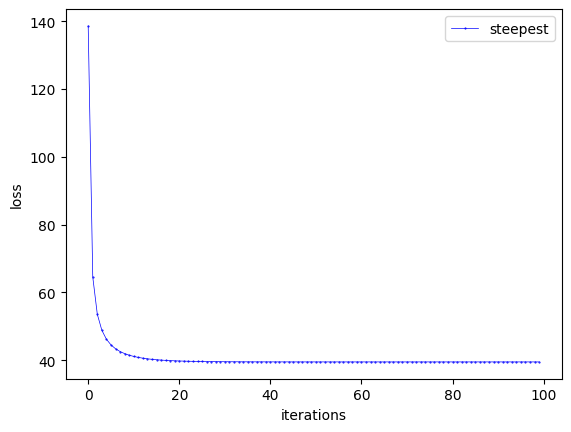

In [50]:
plt.plot(loss_hist_batch_steepest_gradient, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('loss')

# Newton's Method

In [51]:
loss_hist_newton = []
w = np.zeros_like(x[0])
w.shape

(4,)

In [52]:
w_list = []

In [53]:
for t in range(num_iter):
    expo = 1 + np.exp(-y * (x @ w))
    posterior = 1 / expo
    res = ((1 - posterior) * y * x.T).T
    grad =  -np.sum(res, axis=0) + 2 * lam * w

    s = np.diag(posterior * (1 - posterior))
    hess =  (x.T @ s @ x) + 2 * lam * np.eye(w.shape[0])
    # if t < 5:
    #     print(hess.shape, hess)
    direction = -np.linalg.inv(hess) @ grad

    loss =  np.sum(np.log(expo)) + lam * (w.T @ w)
    loss_hist_newton.append(loss)
    w = w + alpha * direction
    w_list.append(w)
    # print(w.shape)
    # print(grad, hess)

In [54]:
# w_list

In [55]:
# loss_hist_batch_steepest_gradient

In [56]:
# loss_hist_newton[:5]
print(min(loss_hist_newton))

39.48057239753518


Text(0, 0.5, 'loss')

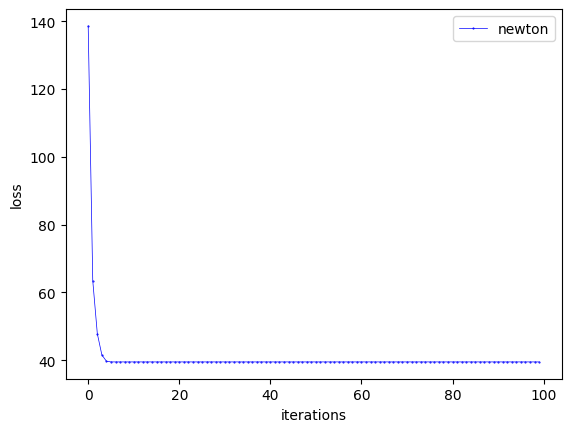

In [57]:
plt.plot(loss_hist_newton, 'bo-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('loss')

min_loss 39.48057239753518


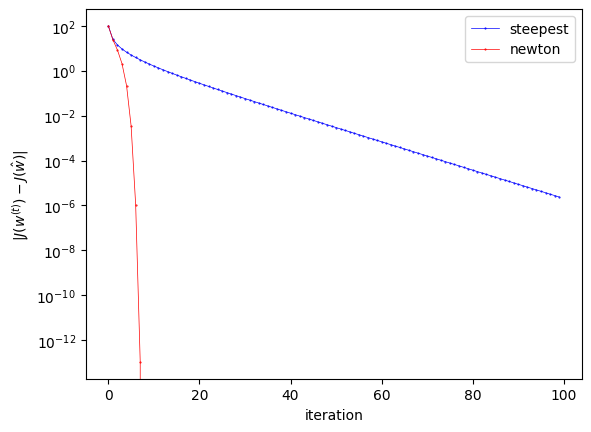

In [58]:
min_loss = min(min(loss_hist_batch_steepest_gradient), min(loss_hist_newton))
print('min_loss', min_loss)
plt.plot(np.abs(loss_hist_batch_steepest_gradient - min_loss), 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot(np.abs(loss_hist_newton - min_loss), 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('$|J(w^{(t)})-J(\hat{w})|$')
plt.show()

# EXAMPLE

In [59]:
# # prepare dataset
# np.random.seed(777)
# n = 40
# omega = np.random.randn()
# noise = 0.8 * np.random.randn(n)
# lam = 0.01
# x = np.random.randn(n, 2)
# y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

# plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
# plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')
# plt.xlabel('x')
# plt.ylabel('y')

In [60]:
# # newton
# ll_n_history = np.zeros(num_iter)
# ww_n_history = np.zeros(num_iter)
# ww = 3

# for t in range(num_iter):
#     posterior = 1 / (1 + np.exp(-y * (ww * x[:,0] + x[:,1])))
    
#     grad = 1 / n * np.sum((1 - posterior) * (-y) * x[:,0]) + 2 * lam * ww
#     hess = 1 / n * np.sum(posterior * (1 - posterior) * x[:,0]**2) + 2 * lam
#     ll = 1/n  * np.sum(np.log(1.0 + np.exp(-y * (ww * x[:,0] + x[:,1])))) + lam * (ww**2 + 1)
#     ww_n_history[t] =  ww
#     ll_n_history[t] = ll
#     print(hess.shape)
#     ww = ww - grad/hess * 1.0 / np.sqrt(t+10)

# plt.plot(ww_n_history, ll_n_history, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
# plt.legend()
# plt.xlabel('wight')
# plt.ylabel('loss')